# SMD Übungszettel Nr. 11

__Abgabe von: Kusurmann, Pape und Becker__

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2, poisson
import math
import scipy

np.random.seed(8)

## Aufgabe 32

Der $\chi^2$ Test ist definiert als:

$$
\chi^2 = \sum_{i=1}^{N} \frac{\left(y_i - \bar{y}\right)^2}{\sigma_i^2}
$$

In [2]:
y = np.array([31.6, 32.2, 31.2, 31.9, 31.3, 30.8, 31.3])
y_A = 31.3 
y_B = 30.7
sigma = 0.5
df = len(y) - 1 

print(f'Anzahl der Freiheitsgrade: {df}')

Anzahl der Freiheitsgrade: 6


In [3]:
chi_A = sum((y - y_A)**2 / sigma**2)
chi_B = sum((y - y_B)**2 / sigma**2)

print(f"Chi_A lautet: {chi_A:.12}")
print(f"Chi_B lautet: {chi_B:.12}")

Chi_A lautet: 6.08
Chi_B lautet: 21.92


In [4]:
p_A = 1 - chi2.cdf(chi_A, df)
p_B = 1 - chi2.cdf(chi_B, df)

print(f"Die Wahrscheinlichkeit Chi_A oder einen Größeren Wert zu messen liegt bei: {p_A:.2}")
print(f"Die Wahrscheinlichkeit Chi_B oder einen Größeren Wert zu messen liegt bei: {p_B:.2}")


Die Wahrscheinlichkeit Chi_A oder einen Größeren Wert zu messen liegt bei: 0.41
Die Wahrscheinlichkeit Chi_B oder einen Größeren Wert zu messen liegt bei: 0.0013


Aus einem $\chi^2$ Diagramm (siehe Blobel, S.81) kann nun die Wahrscheinlichkeit abgelesen werden oder mit `scipy.stats.chi2.cdf` berchnet werden, dass 
in der Verteilung Werte auftreten die mindestens so groß sind wie der Mittelwert oder größer:

Für $\chi^2_A$ ist $1-P \approx 0.41 \approx 41\% $.

Für $\chi^2_B$ ist $1-P \approx 0.0013 \approx 0.13\% $.

Bei einem Konfidenzniveau von $95\%$ verlangt man $1-P = 0.05$
Daraus folgt das die Hypothese $B$ falsch ist. 

Zusätzlich kann das Ergebnis mit einer $\chi^2$-Tabelle geprüft werden. 
Für eine Signifikanz von $5\%$ darf $\chi^2$ nicht größer gleich $12.59$ sein.

## Aufgabe Nr. 33

### Aufgabenteil a)

Die Varianz und der Mittelwert der Poisson Verteilung ist durch $\lambda$ gegeben. 
Somit sollte eine hoge Ähnlichkeit zwischen Gauß und Poisson gegeben sein, wenn
$\mu=\sigma^2=\lambda$ gewählt wird.

### Aufgabenteil b)

In [26]:
def kol_smir_test(hist_A, hist_B, alpha):
    dist_max = max(np.abs(np.cumsum(hist_A[0]) - np.cumsum(hist_B[0])))
    size_of_A, size_of_B = len(hist_A[0]), len(hist_A[0])
    
    d_test = np.sqrt(size_of_A * size_of_B / (size_of_A + size_of_B)) * dist_max
    K_alpha = np.sqrt(1/2 * np.log(2 / alpha))  
    
    return d_test > K_alpha 

### Aufgabenteil c)

Alpha: 0.05
Unterscheidbar für lambdar = 10: False. 

Alpha: 0.025
Unterscheidbar für lambdar = 10: False. 

Alpha: 0.001
Unterscheidbar für lambdar = 7: False. 



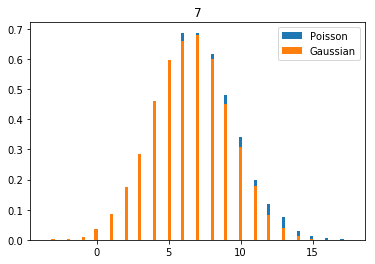

In [31]:
number_of_numbers = 10000
for alpha in (0.05, 0.025, 0.001):
    for lambdar in range(1, 30, 1):

        poisson = np.random.poisson(lam=lambdar, size=number_of_numbers)
        gaussian = np.floor(np.random.normal(loc=lambdar, scale=np.sqrt(lambdar), size=number_of_numbers))
    
        bins = np.linspace(lambdar - 4*np.sqrt(lambdar), lambdar + 4*np.sqrt(lambdar), 100)
    
        poisson_hist = plt.hist(poisson, bins=bins, label='Poisson', density=True);
        gaussian_hist = plt.hist(gaussian, bins=bins, label='Gaussian', density=True);
        plt.legend();
        plt.title(f'{lambdar}')
        #if lambdar % 5 == 0:
         #   plt.show()
    
        unterscheidbar = kol_smir_test(poisson_hist, gaussian_hist,alpha)
    

        if unterscheidbar == False:
            print(f'Alpha: {alpha}')
            print(f'Unterscheidbar für lambdar = {lambdar}: {unterscheidbar}. \n')
            break
        plt.clf()

## Aufgabe 34

### Aufgabenteil a)

Wir betrachten Poisson verteilte Daten: $$p(x) = \frac{\lambda^x}{x!}\exp(-\lambda).$$
Die Likelihood Funktion kann geschrieben werden als:

$$\begin{aligned}
L(\lambda) = \Pi_{i} p(\lambda|x_i) &= \Pi_{i}^N \frac{\lambda^{x_i}}{x_i!}\exp(-\lambda)\\
&=\exp(-N\lambda)\left( \frac{\Pi_{i}^N\lambda^{x_i}}{\Pi_i^N  x_i!} \right)\\
&=\frac{\exp(-N\lambda)}{\Gamma}\lambda^{\Sigma_i^N x_i}, \quad \text{mit} \, \Gamma:=\Pi_{i}^N{x_i!}
\end{aligned}$$

Bestimme das Maximum von $L$:

$$\begin{aligned}
\frac{\partial}{\partial \lambda} L(\lambda) = \frac{\exp(-N\lambda)}{\Gamma}\left((\Sigma_i^N x_i)\lambda^{(\Sigma_i^N x_i) - 1} - N\lambda^{\Sigma_i^N x_i}\right)&\overset{!}{=}0\\
\Rightarrow \quad (\Sigma_i^N x_i)\lambda^{(\Sigma_i^N x_i) - 1} - N\lambda^{\Sigma_i^N x_i} &= 0\\
\Leftrightarrow \quad (\Sigma_i^N x_i)\lambda^{(\Sigma_i^N x_i) - 1} &=  N\lambda^{\Sigma_i^N x_i}\\
\Leftrightarrow \quad \lambda &= \frac{\Sigma_i^N x_i}{N}= \bar{x}
\end{aligned}$$

In [7]:
def poi(x, lam):
    return lam**(x)/math.factorial(x) * np.exp(-lam)

In [32]:
x = np.array([4135, 4202, 4203, 4218, 4227, 4231, 4310])
lam = x.mean()
day = np.arange(0, len(x))
print(f'Die wahrscheinlichste Zählrate lautet: {lam}')

Die wahrscheinlichste Zählrate lautet: 4218.0


### Aufgabenteil c)

In [35]:
def logL(parameters):
    m = parameters[0]
    b = parameters[1]
    
    return len(x) * b + np.sum(m * day - x * np.log(m * day + b)) 

m: 2.2e+01, b: 4.2e+03


Text(0.5, 0, 'Days')

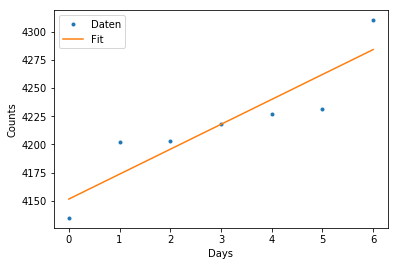

In [50]:
params = scipy.optimize.minimize(logL, [0, lam])


print(f"m: {params['x'][0]:.2}, b: {params['x'][1]:.2}")

plt.plot(day, x, '.', label='Daten')
plt.plot(day, params['x'][0] * day + params['x'][1], label='Fit')
plt.legend()
plt.ylabel('Counts')
plt.xlabel('Days')

### Aufgabenteil c)

In [53]:
chi_square = -2*np.sum(np.log((params['x'][0] * x + params['x'][1])/lam**(x) * np.exp(-(params['x'][0] * x + params['x'][1])+lam)))

chi_square

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


inf

## Aufgabe 35

### Aufagbenteil a)

Der Likelihood Quotienten Test lautet

$$
\Gamma = \frac{\mathrm{sup}_{\theta_0\in\Theta_0} L(\theta|x)}{\mathrm{sup}_{\theta\in\Theta} L(\theta|x)}.
$$

In unserem Fall ist $\Theta$ gegeben als zwei dimensionaler Parameterraum: $\Theta = (\mu,\sigma)= \{\mu\} \otimes \{\sigma\}$.
Die Nullhypothese legt $\mu$ auf $\mu_0$ fest, lässt aber $\sigma$ beliebig ($\Theta_0 = (\mu_0, \sigma)$). Somit kann das  Suprema der Likelihood-Funktion $\mathrm{sup}_{\theta_0\in\Theta_0} L(\theta|x)$ gefunden werden, wenn das Maximum von $L$ bzgl $\sigma$ bei gegebenen $\mu_0$ bestimmt wird. 

Wir betrachten eine Normalverteilung: 
$$
p(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2} \frac{\left(x-\mu\right)^2}{\sigma^2}\right)
$$

Bei der Maximierung der Likelihood Funktion bietet sich an die Log-Likelihood-Funktion zu verwenden. 
Aus der bekannten Berechnung folgt für die Varianz bei $N$ Messwerten:

$$
\sigma^2 = \frac{1}{N} \sum_i^{N} \left(x_i - \mu\right)^2 = \frac{1}{N} \sum_i^{N} \left(x_i - \mu_0\right)^2 \qquad (1)
$$

Um $\mathrm{sup}_{\theta_0\in\Theta} L(\theta|x)$ zu bilden, muss $L$ bzgl. $\mu$ und $\sigma$ maximiert werden. 
Es folgt für $\mu$:

$$
\mu = \frac{1}{N} \sum_i^N x_i = \bar{x}
$$ 

Und somit mit Gleichung $(1)$ für $\sigma^2$:

$$
\sigma^2 = \frac{1}{N} \sum_i^{N} \left(x_i - \bar{x}\right)^2
$$

## Aufgabe 36

### Aufgabenteil e)

In [9]:
n = np.array([111, 188, 333])
m = np.array([15, 36, 30])

N = n.sum()
M = m.sum()

chi_square = 1/(N*M) * ((N*m-M*n)**2/(n+m)).sum()

In [10]:
1 - chi2.cdf(chi_square, 2)

0.014778524417997208

Hypothese wird für $0.01$ verworfen